## Aim :- To build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

### Dataset Description:
    
Loan_ID :- Unique Loan ID   
Gender :- Male/ Female    
Married :- Applicant married (Y/N)    
Dependents :- Number of dependents    
Education :- Applicant Education (Graduate/ Under Graduate)     
Self_Employed :- Self employed (Y/N)     
ApplicantIncome :- Applicant income       
CoapplicantIncome :- Coapplicant income       
LoanAmount :- Loan amount in thousands      
Loan_Amount_Term :- Term of loan in months       
Credit_History :- credit history meets guidelines       
Property_Area :- Urban/ Semi Urban/ Rural      
Loan_Status :- Loan approved (Y/N)      

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Now Load our Dataset 

In [2]:
data=pd.read_csv("loan_prediction.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
data.drop('Loan_ID', axis=1, inplace= True)

In [4]:
data.shape

(614, 12)

Dependents columns having value 3+, which we will convert into 3 only and we will change the data type of the column also.

In [5]:
data.isin(["3+"]).sum()

Gender                0
Married               0
Dependents           51
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data.replace(to_replace="3+", value='3', inplace= True)

In [7]:
cat_features= data.select_dtypes(include=[np.object])
cat_features.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [8]:
for col in cat_features:
    print('\n%s column: '%col)
    print(data[col].value_counts())
    print('...'*10)


Gender column: 
Male      489
Female    112
Name: Gender, dtype: int64
..............................

Married column: 
Yes    398
No     213
Name: Married, dtype: int64
..............................

Dependents column: 
0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64
..............................

Education column: 
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
..............................

Self_Employed column: 
No     500
Yes     82
Name: Self_Employed, dtype: int64
..............................

Property_Area column: 
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
..............................

Loan_Status column: 
Y    422
N    192
Name: Loan_Status, dtype: int64
..............................


Filling Null values in categorical columns using Mode.

In [9]:
data['Gender'].fillna(value='Male', inplace=True)

In [10]:
data['Married'].fillna(value='Yes', inplace=True)

In [11]:
data['Dependents'].fillna(value='0', inplace=True)

In [12]:
data['Self_Employed'].fillna(value='No', inplace=True)

now we fill the numerical Numerical data. We will use mean or meadian to replace null values.
First check skewness for categorical data.

In [13]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
num_features= data.select_dtypes(include=[np.number])
num_features.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [15]:
data['LoanAmount'].fillna(value=data['LoanAmount'].median(), inplace= True)

In [16]:
data['Loan_Amount_Term'].fillna(value=data['Loan_Amount_Term'].median(), inplace= True)

In [17]:
data['Credit_History'].fillna(value=data['Credit_History'].median(), inplace= True)

In [18]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [20]:
data['Dependents']=data['Dependents'].astype(str).astype(int)

From the above information we have find that the data has 8 object type columns and 4 float type columns and only 1 int type columns.

<AxesSubplot:>

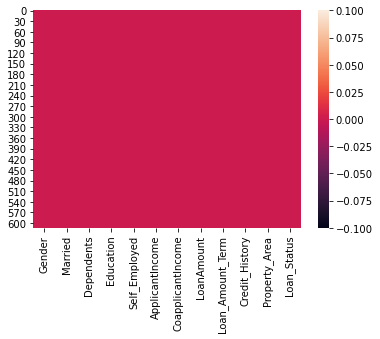

In [21]:
sns.heatmap(data.isnull())

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Loan_Status']=le.fit_transform(data['Loan_Status'])

# Exploratory data analysis (EDA)

### Univariate analysis

In [23]:
data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0


Yes    401
No     213
Name: Married, dtype: int64

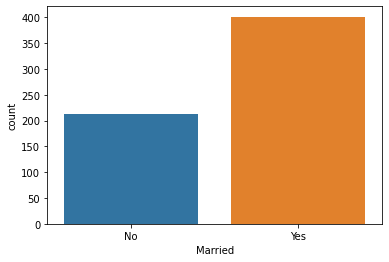

In [24]:
sns.countplot(x='Married', data=data)
data['Married'].value_counts()



we can see that most of the people are Married.

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

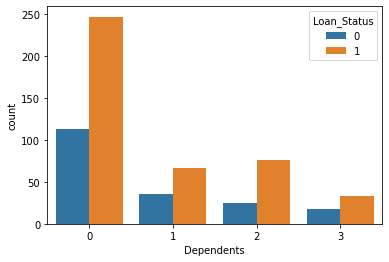

In [25]:
sns.countplot(x='Dependents', data=data, hue="Loan_Status")
data['Dependents'].value_counts()

we can see that most of people are in which Less person are Dependents.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

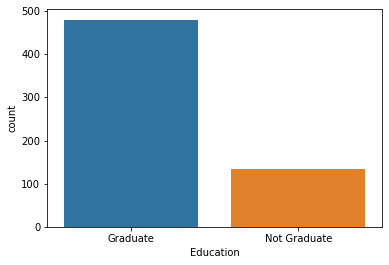

In [26]:
sns.countplot(x='Education', data=data)
data['Education'].value_counts()

we can see that most of People are Graduate.

No     532
Yes     82
Name: Self_Employed, dtype: int64

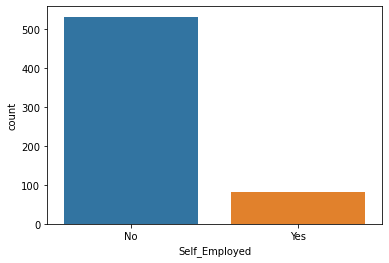

In [27]:
sns.countplot(x='Self_Employed', data=data)
data['Self_Employed'].value_counts()

we can see that only less people are Self_Employed.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

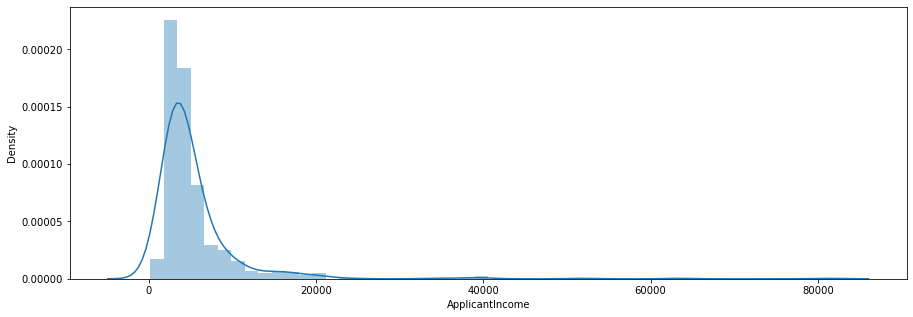

In [28]:
plt.figure(figsize=(15,5))
sns.distplot(data['ApplicantIncome'])


we can see that the most of ApplicantIncome are under the range of 0 to 20000

In [29]:
data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

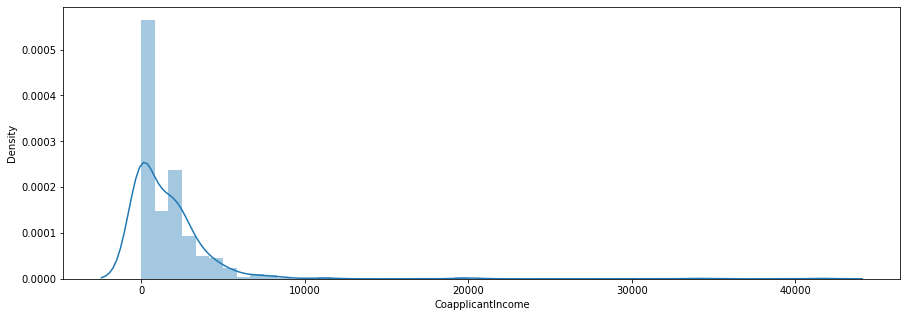

In [30]:
plt.figure(figsize=(15,5))
sns.distplot(data['CoapplicantIncome'])

we can see that the most of CoapplicantIncome are under the range of 0 to 10000

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

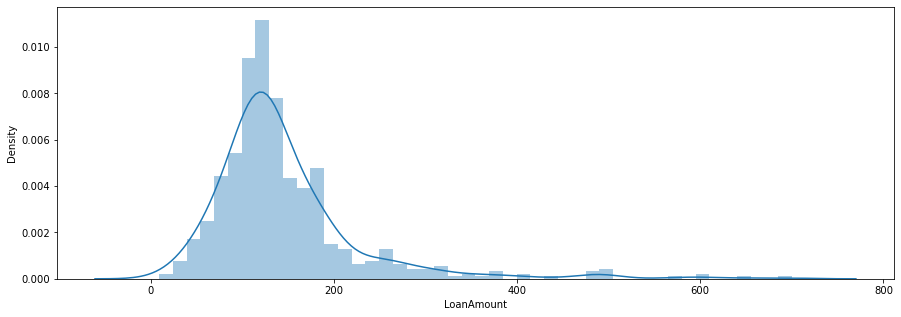

In [31]:
plt.figure(figsize=(15,5))
sns.distplot(data['LoanAmount'])

we can see that the most of the people take LoanAmount are under the range of 0 to 200

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

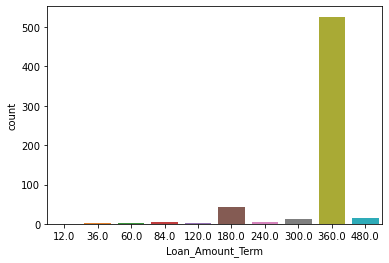

In [32]:
sns.countplot(x='Loan_Amount_Term', data=data)
data['Loan_Amount_Term'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

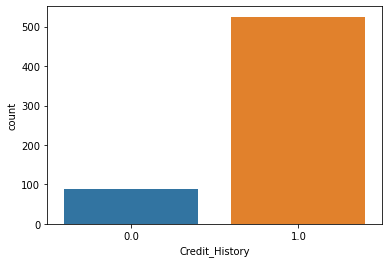

In [33]:
sns.countplot(x='Credit_History', data=data)
data['Credit_History'].value_counts()

we can see that the most of the 475 person Credit_History  1.0 only 89 person has 0.0 Credit_History.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

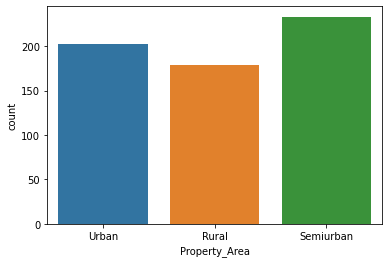

In [34]:
sns.countplot(x='Property_Area', data=data)
data['Property_Area'].value_counts()

we can see that the 233 people are living in Semiurban area and 202 people are living in urban area and 179 people are living in Rural area.

# Bivariate analysis

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

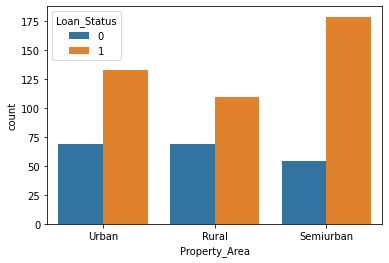

In [35]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=data)
data['Property_Area'].value_counts()

we can see that the those people are living in semiurban area they are heighly chance for Loan.

In [36]:
data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1


No     532
Yes     82
Name: Self_Employed, dtype: int64

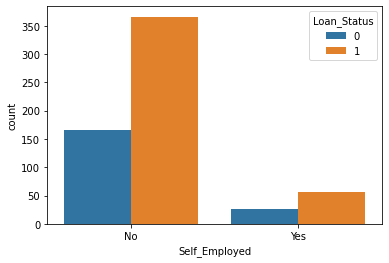

In [37]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data=data)
data['Self_Employed'].value_counts()

we can see that those people are self_Employed they are less chance to get the bank Loan.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

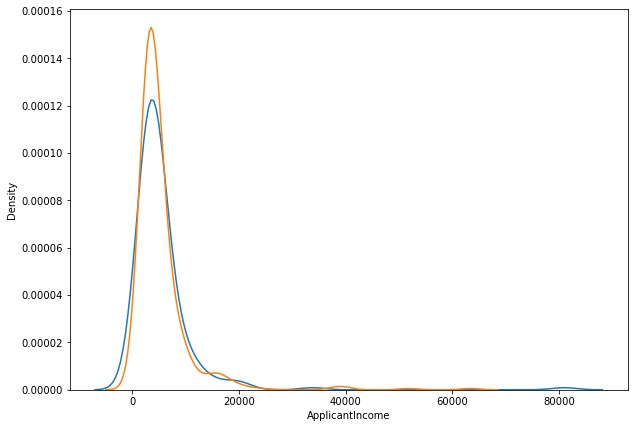

In [38]:
plt.figure(figsize=(10,7))
sns.distplot(data[data['Loan_Status']==0]['ApplicantIncome'],hist=False)
sns.distplot(data[data['Loan_Status']==1]['ApplicantIncome'],hist=False)


we can see that those ApplicantIncome are under 0 to 20000 they are heighly chance to get the Loan.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

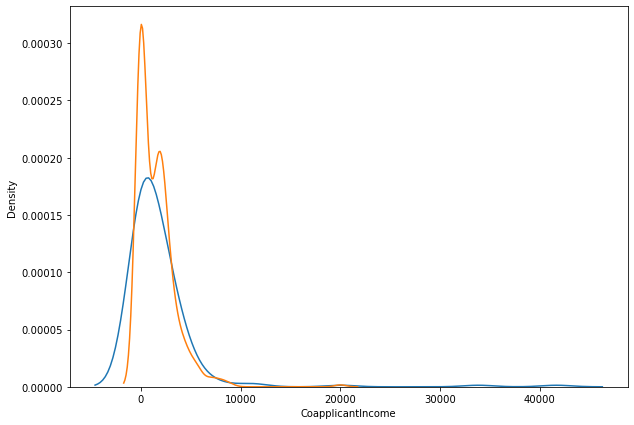

In [39]:
plt.figure(figsize=(10,7))
sns.distplot(data[data['Loan_Status']==0]['CoapplicantIncome'],hist=False)
sns.distplot(data[data['Loan_Status']==1]['CoapplicantIncome'],hist=False)


we can see that those CoapplicantIncome are under 0 to 10000 they are heighly chance to get the Loan.

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

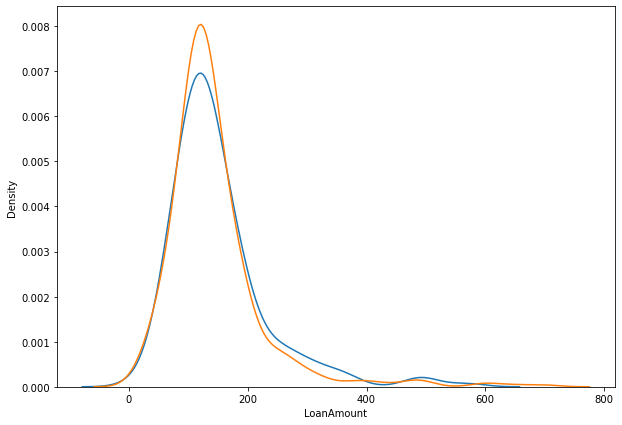

In [40]:
plt.figure(figsize=(10,7))
sns.distplot(data[data['Loan_Status']==0]['LoanAmount'],hist=False)
sns.distplot(data[data['Loan_Status']==1]['LoanAmount'],hist=False)


we can see that those people want to Loan under the range of 0 to 200 they are heighly probability to get the Loan.

1.0    525
0.0     89
Name: Credit_History, dtype: int64

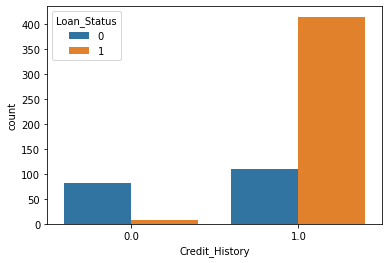

In [41]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=data)
data['Credit_History'].value_counts()

we can see that those people has Credit_History 1.0 they are heighly probability to get the Loan.

## Multivariate Anaysis

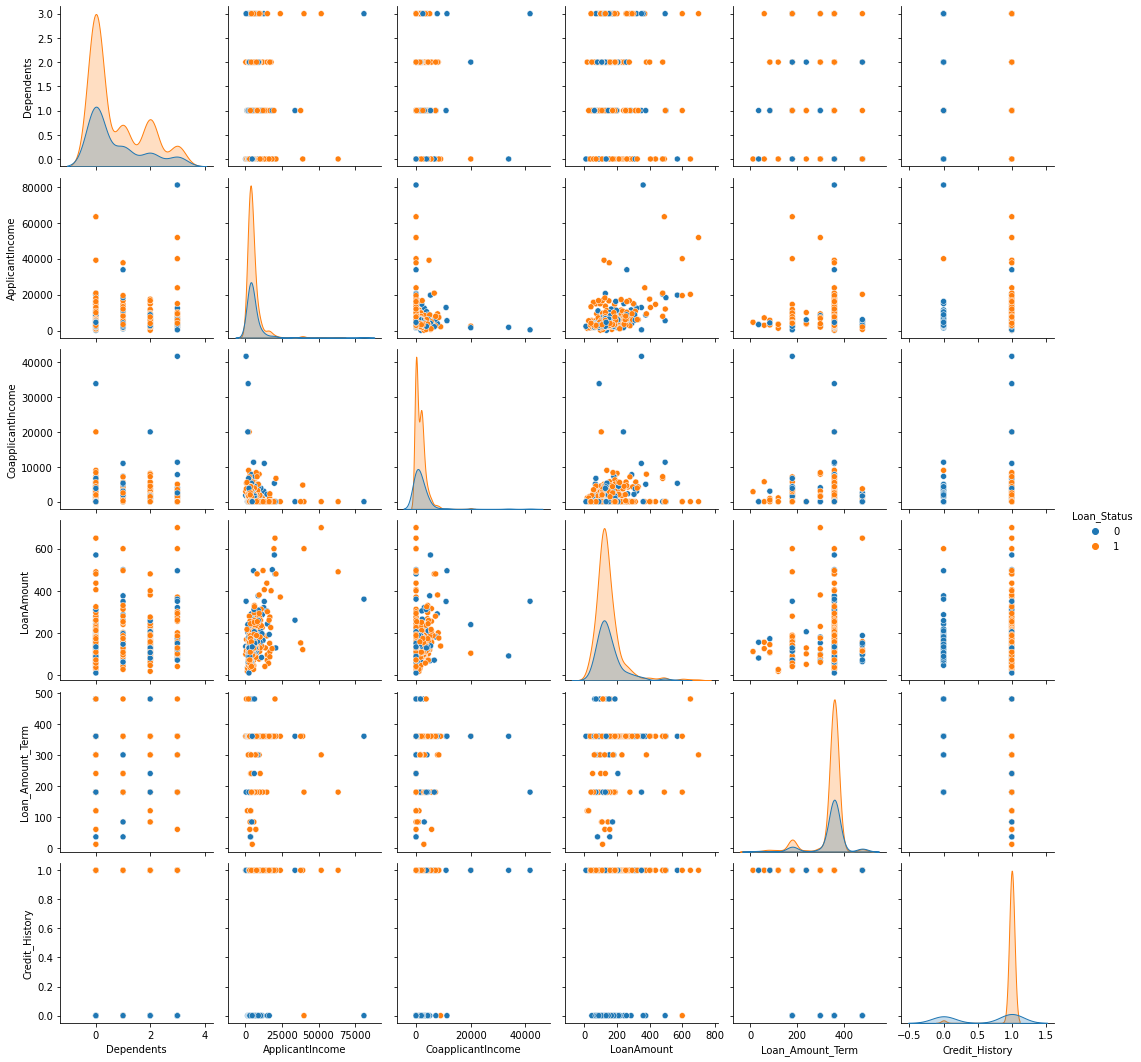

In [42]:
sns.pairplot(data=data, hue='Loan_Status')

## Data Preprocessing

In this stage we will prepare our data for model builing     
we will change the categorical data into numerical data using encoders     
Then we will check the outliers and skewness for conteneus columns.     
At the scaling of data etc.     

In [43]:
feature=data.drop(['Loan_Status'], axis=1)

In [44]:
target= data['Loan_Status']

In [45]:
data_new= pd.get_dummies(feature,sparse=False, drop_first=True )

In [46]:
data_new['Loan_Status']= target

In [47]:
data_new.shape

(614, 13)

In [48]:
data_new.shape

(614, 13)

In [49]:
data_new.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1


In [50]:
data_new.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status'],
      dtype='object')

In [51]:
data_new.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
Dependents,1.000000,0.118202,0.030430,0.163103,-0.103864,-0.040160,0.172914,0.334216,0.055752,0.056798,0.001924,-0.001198,0.010118
ApplicantIncome,0.118202,1.000000,-0.116605,0.565181,-0.046531,-0.018615,0.058809,0.051708,-0.140760,0.127180,-0.014246,-0.000598,-0.004710
CoapplicantIncome,0.030430,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.082912,0.075948,-0.062290,-0.016100,-0.027044,0.022776,-0.059187
LoanAmount,0.163103,0.565181,0.189218,1.000000,0.036960,-0.000607,0.106904,0.146546,-0.168759,0.115100,-0.005804,-0.036050,-0.033214
Loan_Amount_Term,-0.103864,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.074030,-0.100912,-0.073928,-0.033739,0.059141,-0.094279,-0.022549
Credit_History,-0.040160,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.009170,0.010938,-0.073658,-0.001550,0.035976,-0.016934,0.540556
Gender_Male,0.172914,0.058809,0.082912,0.106904,-0.074030,0.009170,1.000000,0.364569,0.045364,-0.000525,-0.108623,0.034530,0.017987
Married_Yes,0.334216,0.051708,0.075948,0.146546,-0.100912,0.010938,0.364569,1.000000,0.012304,0.004489,0.005845,0.000546,0.091478
Education_Not Graduate,0.055752,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,0.045364,0.012304,1.000000,-0.010383,-0.039410,-0.034279,-0.085884
Self_Employed_Yes,0.056798,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.000525,0.004489,-0.010383,1.000000,0.008710,-0.030338,-0.003700


<AxesSubplot:>

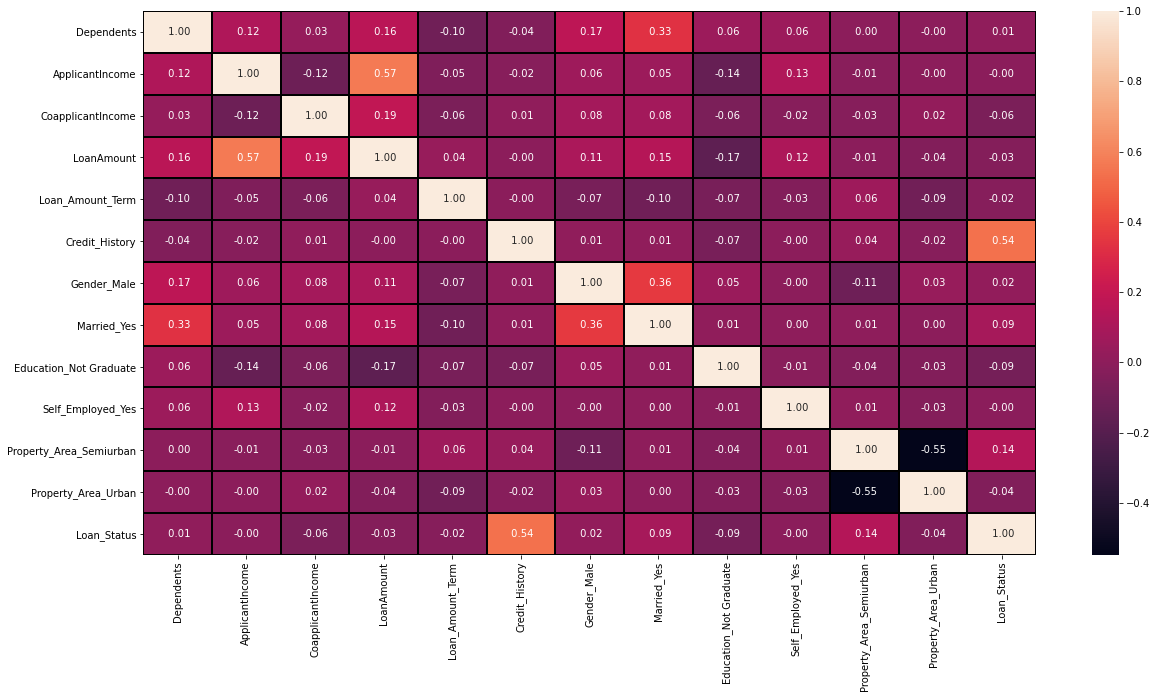

In [52]:
plt.figure(figsize=(20,10))
sns.heatmap(data_new.corr(), annot=True, linewidths=1,linecolor='black',fmt=' .2f')

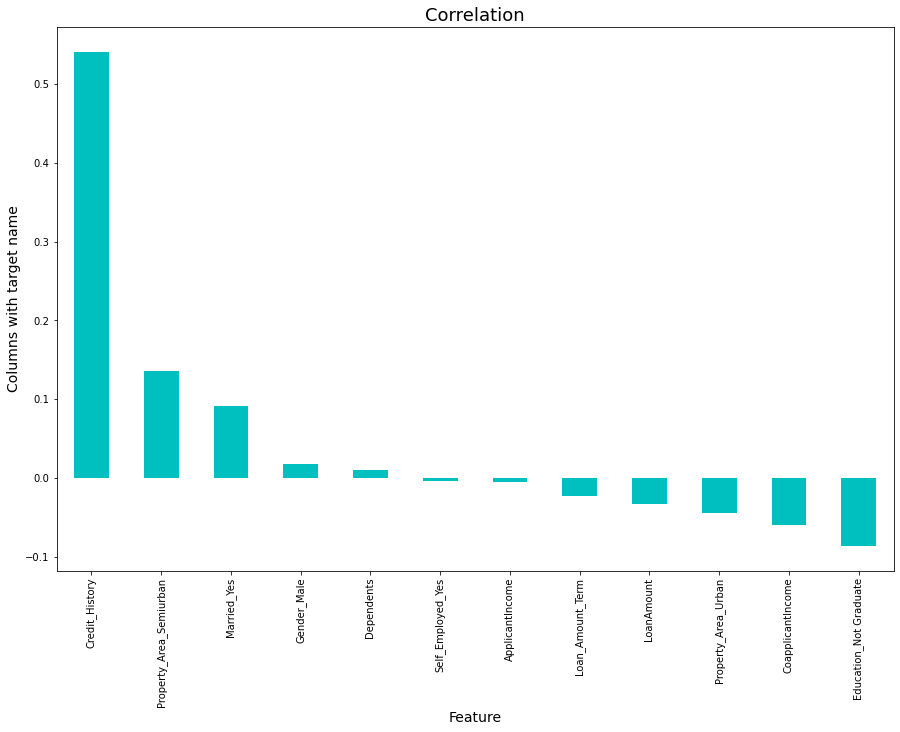

In [53]:
plt.figure(figsize=(15,10))
data_new.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Here we can see Credit histry , Property area, Married_yes, Gender and Dependents columns having positive corelation, where as other have negative or zero corelation.

# Checkign outliers and skewness

<AxesSubplot:>

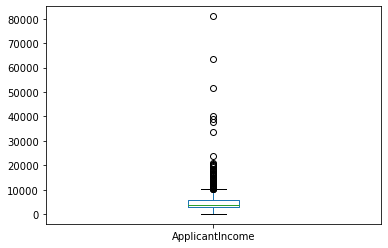

In [54]:
data_new['ApplicantIncome'].plot.box()

<AxesSubplot:>

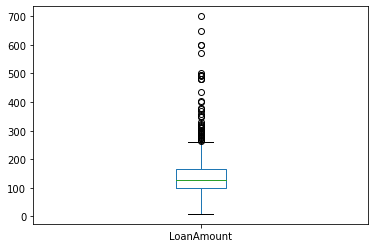

In [55]:
data_new['LoanAmount'].plot.box()

<AxesSubplot:>

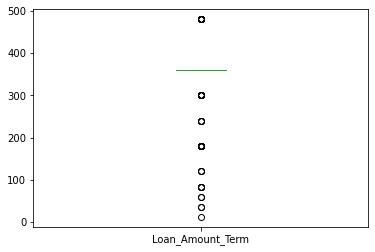

In [56]:
data_new['Loan_Amount_Term'].plot.box()

In [57]:
from scipy.stats import zscore
z= np.abs(zscore(data_new))
z

array([[0.73780632, 0.07299082, 0.55448733, ..., 0.7820157 , 1.42814704,
        0.67451931],
       [0.25346957, 0.13441195, 0.03873155, ..., 0.7820157 , 0.70020801,
        1.48253724],
       [0.73780632, 0.39374734, 0.55448733, ..., 0.7820157 , 1.42814704,
        0.67451931],
       ...,
       [0.25346957, 0.43717437, 0.47240418, ..., 0.7820157 , 1.42814704,
        0.67451931],
       [1.24474546, 0.35706382, 0.55448733, ..., 0.7820157 , 1.42814704,
        0.67451931],
       [0.73780632, 0.13441195, 0.55448733, ..., 1.2787467 , 0.70020801,
        1.48253724]])

Position of Outliers

In [58]:
threshold = 3
print(np.where(z > 3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([2, 4, 4, 4, 1, 3, 4, 1, 3, 1, 3, 2, 3, 1, 1, 4, 4, 3, 3, 4, 1, 3,
       3, 2, 1, 2, 3, 1, 3, 4, 4, 3, 3, 3, 4, 3, 4, 2, 4, 2, 3],
      dtype=int64))


In [59]:
df=data_new[(z<3).all(axis=1)]
print(data_new.shape)
print(df.shape)

(614, 13)
(577, 13)


In [60]:
Loss_percentage=(614-577)/614*100
print(Loss_percentage)

6.026058631921824


In [61]:
df.skew()

Dependents                 1.052106
ApplicantIncome            2.148522
CoapplicantIncome          1.350517
LoanAmount                 1.151525
Loan_Amount_Term          -2.098806
Credit_History            -1.976043
Gender_Male               -1.622920
Married_Yes               -0.630211
Education_Not Graduate     1.306588
Self_Employed_Yes          2.252848
Property_Area_Semiurban    0.512963
Property_Area_Urban        0.736780
Loan_Status               -0.822635
dtype: float64

In [62]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1


ApplicantIncome, CoapplicantIncome,LoanAmount, Loan_Amount_Term are having skewness, lets remove using log transform.

In [63]:
from sklearn.preprocessing import power_transform

In [64]:
df_skewed=df.iloc[:,0:6]

Applying Transformation

In [65]:
data.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0


In [66]:
X=power_transform(df_skewed, method='yeo-johnson')

Making dataFrame for transformed values.

In [67]:
X=pd.DataFrame(data=X, columns=['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'])

In [68]:
df.drop(['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'], axis=1, inplace=True)

In [69]:
df=df.reset_index()

In [70]:
df['Dependents']=X['Dependents']

In [71]:
df['ApplicantIncome']=X['ApplicantIncome']

In [72]:
df['CoapplicantIncome']=X['CoapplicantIncome']

In [73]:
df['LoanAmount']=X['LoanAmount']

In [74]:
df['Loan_Amount_Term']=X['Loan_Amount_Term']

In [75]:
df['Credit_History']=X['Credit_History']

In [76]:
df

,index,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,0,0,0,0,1,1,-0.809243,0.681780,-1.122446,0.000771,0.130788,0.418513
1,1,1,1,0,0,0,0,0,0.902869,0.234783,0.744117,0.000771,0.130788,0.418513
2,2,1,1,0,1,0,1,1,-0.809243,-0.527201,-1.122446,-1.437336,0.130788,0.418513
3,3,1,1,1,0,0,1,1,-0.809243,-0.791972,0.895786,-0.153545,0.130788,0.418513
4,4,1,0,0,0,0,1,1,-0.809243,0.728848,-1.122446,0.238260,0.130788,0.418513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,609,0,0,0,0,0,0,1,-0.809243,-0.587375,-1.122446,-1.293791,0.130788,0.418513
573,610,1,1,0,0,0,0,1,1.533596,0.035386,-1.122446,-2.332692,-2.562700,0.418513
574,611,1,1,0,0,0,1,1,0.902869,1.281658,0.173344,1.845015,0.130788,0.418513
575,612,1,1,0,0,0,1,1,1.344671,1.164426,-1.122446,0.976055,0.130788,0.418513


## Scaling the data Using StandardScaler.

Dividing into Feature and Target data

In [78]:
x=df.drop(['index', 'Loan_Status'],axis=1)
y=df['Loan_Status']

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
SDC=StandardScaler()
x=SDC.fit_transform(x)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

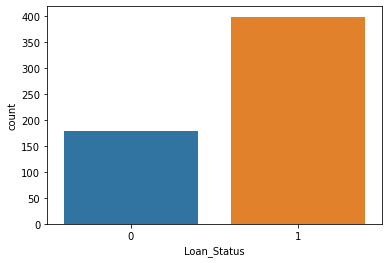

In [81]:
sns.countplot(y)

Here we can see our output is not balanced we will now use SMOTE to balance the output.

In [82]:
from imblearn.over_sampling import SMOTE

In [83]:
X_train_over, Y_train_over =SMOTE(k_neighbors=3).fit_resample(x,y)

In [84]:
X_train_over.shape

(796, 12)

In [85]:
Y_train_over.value_counts()

0    398
1    398
Name: Loan_Status, dtype: int64

Here we can see over data is balance now.

In [86]:
dfx=pd.DataFrame(data=X_train_over, columns=['Gender_Male','Married_Yes','Education_Not Graduate','Self_Employed_Yes','Property_Area_Semiurban','Property_Area_Urban','Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'])

# VIF calculation

In [87]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [89]:
calc_vif(dfx)

,variables,VIF FACTOR
0,Gender_Male,1.252819
1,Married_Yes,1.539754
2,Education_Not Graduate,1.067991
3,Self_Employed_Yes,1.072467
4,Property_Area_Semiurban,1.421700
5,Property_Area_Urban,1.410867
6,Dependents,1.210350
7,ApplicantIncome,1.800419
8,CoapplicantIncome,1.671140
9,LoanAmount,1.657957


Vif is less than 10 we can proceed for model development

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [91]:
x=dfx
y=Y_train_over

In [92]:
print(x.shape)
print(y.shape)

(796, 12)
(796,)


# Chosing Best Random State

In [93]:
lr= LogisticRegression()
for i in range(0,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, random_state= i, test_size= 0.20)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model performing Well")
        print("At Random State", i)
        print("Training Accuracy score is-",accuracy_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is-", accuracy_score(y_test,pred_test)*100)

At Random state  4 The Model performing Well
At Random State 4
Training Accuracy score is- 72.48427672955975
Testing Accuracy Score is- 72.5
At Random state  44 The Model performing Well
At Random State 44
Training Accuracy score is- 73.11320754716981
Testing Accuracy Score is- 73.125
At Random state  46 The Model performing Well
At Random State 46
Training Accuracy score is- 72.48427672955975
Testing Accuracy Score is- 72.5
At Random state  147 The Model performing Well
At Random State 147
Training Accuracy score is- 72.48427672955975
Testing Accuracy Score is- 72.5
At Random state  154 The Model performing Well
At Random State 154
Training Accuracy score is- 72.48427672955975
Testing Accuracy Score is- 72.5
At Random state  177 The Model performing Well
At Random State 177
Training Accuracy score is- 73.11320754716981
Testing Accuracy Score is- 73.125
At Random state  273 The Model performing Well
At Random State 273
Training Accuracy score is- 71.85534591194968
Testing Accuracy Scor

At Random State 887   
Training Accuracy score is- 74.37106918238993    
Testing Accuracy Score is- 74.375    

In [94]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y,random_state=801,test_size=0.20)

In [95]:
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(accuracy_score(y_test_b,lr_pred))

0.71875


In [96]:
from sklearn.metrics import classification_report 
print(confusion_matrix(y_test_b, lr_pred))
print(classification_report(y_test_b, lr_pred))

[[61 26]
 [19 54]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        87
           1       0.68      0.74      0.71        73

    accuracy                           0.72       160
   macro avg       0.72      0.72      0.72       160
weighted avg       0.72      0.72      0.72       160



# Cross validation of model

In [97]:
lr_pred=lr.predict(x_test_b)
from sklearn.model_selection import cross_val_score
lr_score=accuracy_score(y_test_b,lr_pred)
for j in range(2,10):
    lr_cv= cross_val_score(lr,x,y,cv=j, scoring='accuracy')
    lr_cvscore=lr_cv.mean()
    print("at cv:-", j)
    print("Cross Validation scre is:-",lr_cvscore*100)
    print("Accuracy Score:-", lr_score*100)
    print("\n")

at cv:- 2
Cross Validation scre is:- 70.35175879396985
Accuracy Score:- 71.875


at cv:- 3
Cross Validation scre is:- 71.6068473069466
Accuracy Score:- 71.875


at cv:- 4
Cross Validation scre is:- 72.23618090452261
Accuracy Score:- 71.875


at cv:- 5
Cross Validation scre is:- 72.3624213836478
Accuracy Score:- 71.875


at cv:- 6
Cross Validation scre is:- 72.3570289359763
Accuracy Score:- 71.875


at cv:- 7
Cross Validation scre is:- 71.85552376516513
Accuracy Score:- 71.875


at cv:- 8
Cross Validation scre is:- 72.1111111111111
Accuracy Score:- 71.875


at cv:- 9
Cross Validation scre is:- 71.9796277380547
Accuracy Score:- 71.875




at cv:- 7    
Cross Validation scre is:- 71.85552376516513    
Accuracy Score:- 71.875    

# SVC

In [98]:
svc=SVC()
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_d=accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=7, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)

Accuracy_core: 73.75
Cross val Score : 73.74409475014971


In [99]:
print(confusion_matrix(y_test_b, svc_pred))
print(classification_report(y_test_b, svc_pred))

[[62 25]
 [17 56]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.75        87
           1       0.69      0.77      0.73        73

    accuracy                           0.74       160
   macro avg       0.74      0.74      0.74       160
weighted avg       0.74      0.74      0.74       160



Accuracy_core: 73.75    
Cross val Score : 73.74409475014971     
Diffrence is lesser as compare to Logistic regression, lets try anaother model.

# Ensemble Techniques

KNeighborsClassifier

In [100]:
kn=KNeighborsClassifier()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= accuracy_score(y_test_b, kn_pred)
print('accuracy_score:', kn_score*100)

kncvscore=cross_val_score(kn,x,y, cv=7, scoring='accuracy')
kncv_score=kncvscore.mean()
print('Cross val Score :',kncv_score*100 )

accuracy_score: 71.25
Cross val Score : 76.37567369751814


In [101]:
print(confusion_matrix(y_test_b, kn_pred))
print(classification_report(y_test_b, kn_pred))

[[69 18]
 [28 45]]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        87
           1       0.71      0.62      0.66        73

    accuracy                           0.71       160
   macro avg       0.71      0.70      0.71       160
weighted avg       0.71      0.71      0.71       160



accuracy_score: 71.25       
Cross val Score : 76.37567369751814    

Both accuracy score and Cross val score having lesser diffrence, as compare to SVC and logistic, KNeighborsClassifier is performing well.

# DecisionTreeClassifier

In [102]:
dt=DecisionTreeClassifier()
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score= accuracy_score(y_test_b, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x,y,cv=7, scoring='accuracy')
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )

accuracy_score 73.75
Cross val score is: 78.90079180251513


In [103]:
print(confusion_matrix(y_test_b, dt_pred))
print(classification_report(y_test_b, dt_pred))

[[65 22]
 [20 53]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.76        87
           1       0.71      0.73      0.72        73

    accuracy                           0.74       160
   macro avg       0.74      0.74      0.74       160
weighted avg       0.74      0.74      0.74       160



In [104]:
print(confusion_matrix(y_test_b, dt_pred))
print(classification_report(y_test_b, dt_pred))

[[65 22]
 [20 53]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.76        87
           1       0.71      0.73      0.72        73

    accuracy                           0.74       160
   macro avg       0.74      0.74      0.74       160
weighted avg       0.74      0.74      0.74       160



accuracy_score 73.75    
Cross val score is: 78.90079180251513     
Both accuracy score and Cross val score having big diffrence, Model performance is bad.       

# RandomForestClassifier

In [105]:
rf=RandomForestClassifier()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=7, scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  79.375
Cross val Score : 82.79992015436822


In [106]:
print(confusion_matrix(y_test_b, rf_pred))
print(classification_report(y_test_b, rf_pred))

[[66 21]
 [12 61]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        87
           1       0.74      0.84      0.79        73

    accuracy                           0.79       160
   macro avg       0.80      0.80      0.79       160
weighted avg       0.80      0.79      0.79       160



# AdaBoostClassifier

In [107]:
ad=AdaBoostClassifier()
ad.fit(x_train_b, y_train_b)
ad.score(x_train_b,y_train_b)
ad_pred=ad.predict(x_test_b)

ad_score= accuracy_score(y_test_b, ad_pred)
print('accuracy_score: ', ad_score*100)

adcvscore=cross_val_score(ad,x,y, cv=7, scoring='accuracy')
adcv_score=adcvscore.mean()
print('Cross val Score :',adcv_score*100 )

accuracy_score:  75.625
Cross val Score : 73.36704593341761


In [108]:
print(confusion_matrix(y_test_b, ad_pred))
print(classification_report(y_test_b, ad_pred))

[[63 24]
 [15 58]]
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        87
           1       0.71      0.79      0.75        73

    accuracy                           0.76       160
   macro avg       0.76      0.76      0.76       160
weighted avg       0.76      0.76      0.76       160



accuracy_score:  75.625     
Cross val Score : 73.36704593341761    
we can see that their is less difference between accuracy_score and Cross val Score

# GaussianNB

In [109]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b, y_train_b)
gb_pred=gb.predict(x_test_b)

gb_score=accuracy_score(y_test_b, gb_pred)
print("Accuracy Score is:", gb_score*100)

gb_cv= cross_val_score(gb, x,y,cv=7, scoring='accuracy')
gb_cvscore=gb_cv.mean()
print("Cross Val Score is :", gb_cvscore*100)

Accuracy Score is: 71.875
Cross Val Score is : 70.85301749950096


In [110]:
print(confusion_matrix(y_test_b, gb_pred))
print(classification_report(y_test_b, gb_pred))

[[45 42]
 [ 3 70]]
              precision    recall  f1-score   support

           0       0.94      0.52      0.67        87
           1       0.62      0.96      0.76        73

    accuracy                           0.72       160
   macro avg       0.78      0.74      0.71       160
weighted avg       0.79      0.72      0.71       160



Accuracy Score is: 71.875      
Cross Val Score is : 70.85301749950096     
Model performance is good    

# Hyperparameter Tuning of the model

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters={'n_estimators' : [100, 300,400, 500, 800, 1200], 'criterion':['gini', 'entropy'], 'max_features':['auto','sqrt', 'log2'], 'min_samples_split':[2, 5, 10, 15, 100],'max_depth':[5, 8, 15, 25, 30] }
rf=RandomForestClassifier()
rfclf=GridSearchCV(rf, param_grid=parameters, n_jobs=-1)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)

{'criterion': 'entropy', 'max_depth': 25, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 400}


In [112]:
rf=RandomForestClassifier(criterion='gini',max_depth=25, max_features='auto', min_samples_split=2, n_estimators=500 )
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=7,scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  80.625
Cross val Score : 83.17918690531639


In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters= {'criterion':['gini', 'entropy'],'splitter':['best','random'],'max_features':['auto','sqrt','log2'], 'min_samples_leaf':list(range(0,5))}
dt=DecisionTreeClassifier()
dtclf=GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dtclf.fit (x_train_b, y_train_b)
print(dtclf.best_params_) 

{'criterion': 'entropy', 'max_features': 'log2', 'min_samples_leaf': 1, 'splitter': 'best'}


In [114]:
dt=DecisionTreeClassifier(criterion='entropy', max_features='auto', splitter= 'best', min_samples_leaf=1)
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score= accuracy_score(y_test_b, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x,y,cv=7, scoring='accuracy')
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )

accuracy_score 80.625
Cross val score is: 73.62099940115775


In [115]:
from sklearn.neighbors import KNeighborsClassifier
parameters={'n_neighbors':[1,3,4,5,7,9],'weights':['uniform', 'distance'], 'algorithm':['auto','ball_tree','kd_tree', 'brute'], 'leaf_size':[10,20,30,40,50]}
kn=KNeighborsClassifier()
knclf=GridSearchCV(kn,parameters)
knclf.fit(x_train_b, y_train_b)
print(knclf.best_params_)

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 1, 'weights': 'uniform'}


In [116]:
kn=KNeighborsClassifier(algorithm='auto',leaf_size=10,  n_neighbors=1, weights='uniform')
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= accuracy_score(y_test_b, kn_pred)
print('accuracy_score:', kn_score*100)

kncvscore=cross_val_score(kn,x,y, cv=7, scoring='accuracy')
kncv_score=kncvscore.mean()
print('Cross val Score :',kncv_score*100 )

accuracy_score: 78.75
Cross val Score : 81.41592920353983


In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters= {'C':[0.1,1.0,1.5,2,2.5],'kernel':[ 'linear','poly', 'rbf', 'sigmoid'], 'random_state': list(range(0,5)), 'gamma':['scale', 'auto'],'decision_function_shape':['ovo', 'ovr']}
svc=SVC()
clf=GridSearchCV(svc, param_grid=parameters, n_jobs=-1)
clf.fit(x_train_b, y_train_b)
print(clf.best_params_)

{'C': 2.5, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 0}


In [118]:
scv=SVC(C=2.5,decision_function_shape='ovo', gamma='auto', kernel='rbf', random_state=0)
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_d=accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=6, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)

Accuracy_core: 73.75
Cross val Score : 74.24432292853345


The SVC Model shows the best accuracy_score: 73.75 Cross val Score : 73.74 is our best model.

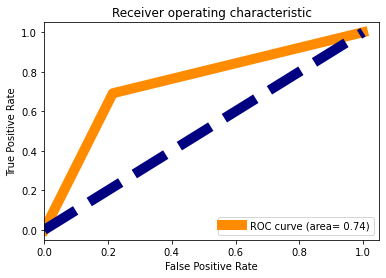

In [119]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(svc_pred, y_test_b)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color='darkorange', lw=10,label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy', lw=10, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [120]:
import pickle
filename="Evaluation_Project_Loan_Application_Status_Prediction.pkl "
pickle.dump(dt, open(filename,'wb'))

In [121]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(svc.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,0,0
1,1,0
2,0,0
3,1,1
4,1,1
...,...,...
155,1,1
156,0,0
157,0,0
158,0,1


### At the end we can see the both Original and pridicted data